In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split



In [3]:
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD

import tensorflow.keras as K
#from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True)# image will be flipper horiztest_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True)

In [5]:
training_set = train_datagen.flow_from_directory(
        'drive/My Drive/Approach-3/output/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

test_set = test_datagen.flow_from_directory(
        'drive/My Drive/Approach-3/output/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False )

Found 799 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [6]:
input_t = K.Input(shape = (64,64,3))
res = K.applications.ResNet50(include_top = False, weights = 'imagenet', input_tensor = input_t)

In [7]:
model = Sequential()
model.add(res)
model.add(Flatten())
model.add(Dropout(rate=0.5))#Add fully connected layer.
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [8]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [9]:
history = model.fit(
        training_set,
        steps_per_epoch=10,
        epochs= 1000) 

Epoch 1/1000
10/10 [==============================] - 86s 9s/step - loss: 5.4492 - accuracy: 0.0562
Epoch 2/1000
10/10 [==============================] - 75s 8s/step - loss: 2.4937 - accuracy: 0.0281
Epoch 3/1000
10/10 [==============================] - 31s 3s/step - loss: 2.3168 - accuracy: 0.0844
Epoch 4/1000
10/10 [==============================] - 16s 2s/step - loss: 2.3057 - accuracy: 0.1034
Epoch 5/1000
10/10 [==============================] - 2s 224ms/step - loss: 2.2971 - accuracy: 0.1437
Epoch 6/1000
10/10 [==============================] - 17s 2s/step - loss: 2.4267 - accuracy: 0.2500
Epoch 7/1000
10/10 [==============================] - 2s 227ms/step - loss: 2.3023 - accuracy: 0.0533
Epoch 8/1000
10/10 [==============================] - 2s 231ms/step - loss: 2.2996 - accuracy: 0.2000
Epoch 9/1000
10/10 [==============================] - 2s 231ms/step - loss: 2.3139 - accuracy: 0.0562
Epoch 10/1000
10/10 [==============================] - 2s 227ms/step - loss: 2.3050 - accura

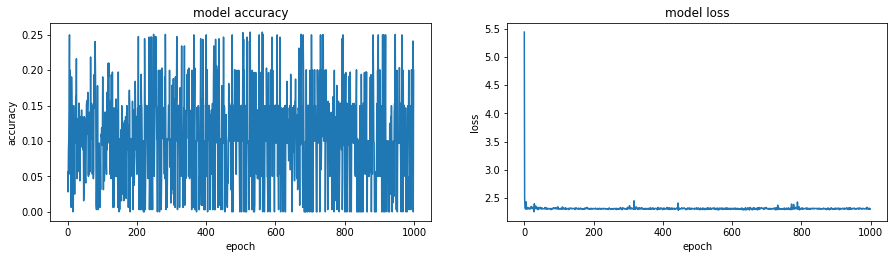

In [10]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])
#plt.plot(model.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')
#plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])
#plt.plot(model.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
#plt.legend(['train', 'valid']) 
plt.savefig('approach_3')
plt.show()